# Assignment 2

Implement sentiment analysis technique for classifying the data in to positive, negative or neutral
class

## 1. TextBlob

**Dependencies**

In [1]:
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('movie_reviews')
from textblob.sentiments import NaiveBayesAnalyzer, PatternAnalyzer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


In [2]:
text = 'Google is a very succcessful company due to its visionary leadership team. They have a very bright future'

**Default Method**

In [3]:
blob = TextBlob(text)
blob.sentiment

Sentiment(polarity=0.24625000000000002, subjectivity=0.45)

**Naive Bayes**

In [4]:
blob = TextBlob(text, analyzer=NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='pos', p_pos=0.8564337703904706, p_neg=0.14356622960953164)

**Default method is PatternAnalyzer**

In [5]:
blob = TextBlob(text, analyzer=PatternAnalyzer())
blob.sentiment 

Sentiment(polarity=0.24625000000000002, subjectivity=0.45)

## 2. Word-Dictionary based

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
pos_words = []
neg_words = []

#Ignoring neutral, both, and other polarities
with open('/content/drive/MyDrive/NLP Practical/dataset/2/subjclueslen1-HLTEMNLP05.tff') as file:
    for line in file:
        line_attrib = line.split()
        word = line_attrib[2].split('=')[1] #2nd column in the file
        polarity = line_attrib[-1].split('=')[1] #last column in the file
        if polarity =='positive':
            pos_words.append(word)
        elif polarity=='negative':
            neg_words.append(word)
            
print('Total positive words found: ',len(pos_words))
print('Total negative words found: ',len(neg_words))

#Write results to file for future use
with open('pos_words.txt', mode='wt', encoding='utf-8') as myfile:
    myfile.write('\n'.join(pos_words))
with open('neg_words.txt', mode='wt', encoding='utf-8') as myfile:
    myfile.write('\n'.join(neg_words))

Total positive words found:  2718
Total negative words found:  4911


**Append your own domain specific words to positive or negative words**

In [8]:
pos_word_add = ['lifted']
for term in pos_word_add:
    pos_words.append(term)

neg_word_add = ['coronavirus','covid','corona','covid19','pandemic','lockdown']
for term in neg_word_add:
    neg_words.append(term)
    
print('Total positive words found: ',len(pos_words))
print('Total negative words found: ',len(neg_words))

Total positive words found:  2719
Total negative words found:  4917


**Function to calculate sentiment based on word-dictionary**

In [9]:
import nltk
def calc_sentiment_based_on_word_dict(text):
    sentiment_score = 0
    words = nltk.word_tokenize(text)
    for word in words:
        if word in pos_words:
            print('pos:',word)
            sentiment_score=sentiment_score+1
        if word in neg_words:
            print('neg:',word)
            sentiment_score=sentiment_score-1
    return sentiment_score/len(words)

**Example 1**

In [10]:
text = 'Google is a very succcessful company due to its visionary leadership team. They have a very bright future'
sentiment = calc_sentiment_based_on_word_dict(text)
print('The sentiment score of this text is: {:.2f}'.format(sentiment) )

pos: visionary
pos: bright
The sentiment score of this text is: 0.11


## 3. C

**Read annotated data file**

In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
news_df = pd.read_csv('POS_NEG_NEWS.csv')
print(news_df.shape)
news_df.head(3)

(30, 4)


<ipython-input-23-d2f5ca80870f>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,id,text,class,url
0,1,"Target stores announced yesterday that it will permanently raise its starting wage for U.S. team members to $15 per hour. Additionally, the company will give a one-time recognition bonus of $200.00 to its frontline store and distribution center hourly workers for their efforts during the coronavirus pandemic.\n\nAdditionally, starting this week, Target is also offering a new healthcare benefit that provides access to free virtual healthcare visits through the end of the year, regardless of whether team members are on a Target health insurance plan. The company also announced additional extensions of a 30-day paid leave for vulnerable team members, as well as free backup care for family members.\n\n“In the best of times, our team brings incredible energy and empathy to our work, and in harder times they bring those qualities plus extraordinary resilience and agility to keep,” said Target CEO Brian Cornell in a statement. “Everything we aspire to do and be as a company builds on the central role our team members play.”",POS,https://www.goodnewsnetwork.org/target-raises-minimum-wage-to-15/
1,2,"He grew up in a gentrified neighborhood with only a few African-American residents, but after confessing that he’s always felt uneasy walking alone on its streets, his faith in humanity was restored by dozens of neighbors who walked with him in solidarity.\n\nThe 29-year-old has lived in the 12 South neighborhood of Nashville his whole life, after his family moved there 54 years ago. But over the course of his life, Shawn Dromgoole has seen the neighborhood change dramatically.\n\nRising home values priced out many of the black families who lived there. As they moved out to find more affordable housing, new families moved in, most of them white and more financially well-off—leaving Shawn feeling out of place in his hometown.",POS,https://www.goodnewsnetwork.org/black-man-scared-to-walk-in-neighborhood-joined-by-75-neighbors/
2,3,"This teenage entrepreneur is responsible for inventing a simple, yet brilliant way to help curb coronavirus infections.\n\n15-year-old Max Melia designed and developed a wearable wristband which alerts users whenever they are about to touch their face\n\nHe first came up with the brilliant idea two years ago as a means of reducing the spread of the cold and flu. After both of Max’s parents contracted COVID-19 four months ago, however, he threw all his efforts into developing a working prototype.\n“Watching this pandemic unfold on the news, it was clear the devastating effect it was having on people lives’ across the world,” says Max. “However, it wasn’t until I saw the severity of the virus first-hand, when my parents both contracted COVID-19, did I truly appreciate just what we were dealing with.”\n\nThe tech-savvy English teen has since produced the VybPro, which warns users whenever they are about to subconsciously touch their face.\n\nThe gesture has been recognized as one of the key ways that coronavirus can be transmitted, making it a potentially live-saving invention.",POS,https://www.goodnewsnetwork.org/teen-invents-wristband-that-warns-against-touching-your-face/


**Dependencies**

In [ ]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_recall_fscore_support as score

**Prepare Predictor and Response variables**

In [ ]:
X = news_df['text']
y = news_df['class'].map({'POS':0, 'NEG':1})
print(X.shape)
print(y.shape)

(30,)
(30,)


**Create train/test split with stratification**

In [ ]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=1,stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20,)
(10,)
(20,)
(10,)


**Vectorize data using CountVectorizer**

In [ ]:
vectorizer = CountVectorizer(analyzer='word',
                        max_df=0.9,
                        max_features=1000,
                        ngram_range=(1, 3))

X_train_dtm = vectorizer.fit_transform(X_train)
X_test_dtm = vectorizer.transform(X_test)

**Function to fit three different ML models**

In [ ]:
models = [MultinomialNB,LogisticRegression,SGDClassifier]

def fit_models(X_train,y_train,X_test,y_test,model):
    model = model()
    model.fit(X_train,y_train)
    return model

**Model 1 - Naive Bayes**

In [ ]:
#Naive Bayes
%time model = fit_models(X_train_dtm,y_train,X_test_dtm,y_test,models[0])
# make class predictions for X_test_dtm
y_pred_class = model.predict(X_test_dtm)

# calculate accuracy of class predictions
print('Accuracy Score:',metrics.accuracy_score(y_test, y_pred_class))


# calculate precision and recall
print(classification_report(y_test, y_pred_class))


# calculate the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_class))

CPU times: user 2.33 ms, sys: 32 µs, total: 2.36 ms
Wall time: 2.08 ms
Accuracy Score: 0.9
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.80      0.89         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10

[[5 0]
 [1 4]]


**Model 2 - Logistic Regression**

In [ ]:
#Logistic Regression Bayes
%time model = fit_models(X_train_dtm,y_train,X_test_dtm,y_test,models[1])
# make class predictions for X_test_dtm
y_pred_class = model.predict(X_test_dtm)

# calculate accuracy of class predictions
print('Accuracy Score:',metrics.accuracy_score(y_test, y_pred_class))

# calculate precision and recall
print(classification_report(y_test, y_pred_class))

# calculate the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_class))

CPU times: user 15.1 ms, sys: 912 µs, total: 16 ms
Wall time: 23 ms
Accuracy Score: 0.9
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.80      0.89         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10

[[5 0]
 [1 4]]


**Model 3 - SVM**

In [ ]:
#SVM
%time model = fit_models(X_train_dtm,y_train,X_test_dtm,y_test,models[2])
# make class predictions for X_test_dtm
y_pred_class = model.predict(X_test_dtm)

# calculate accuracy of class predictions
print('Accuracy Score:',metrics.accuracy_score(y_test, y_pred_class))

# calculate precision and recall
print(classification_report(y_test, y_pred_class))

# calculate the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_class))
countVect_SVM_CM = metrics.confusion_matrix(y_test, y_pred_class)

CPU times: user 844 µs, sys: 1.9 ms, total: 2.75 ms
Wall time: 3.28 ms
Accuracy Score: 0.7
              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.62      1.00      0.77         5

    accuracy                           0.70        10
   macro avg       0.81      0.70      0.67        10
weighted avg       0.81      0.70      0.67        10

[[2 3]
 [0 5]]


**Unseen Test example 1**

In [ ]:
text = ["Today was a grim day for New Delhi where there happend communal riots and many people were killed in the clashes. The police arrested 100 people in connnection with the riots."]
val_vect = vectorizer.transform(text)
%time y_pred_class = model.predict(val_vect)
print(y_pred_class)

CPU times: user 0 ns, sys: 216 µs, total: 216 µs
Wall time: 221 µs
[1]


**Unseen Test example 2**

In [ ]:
text = ["I am happy that university has given me scholarship for my Masters degree. The police also lifted the curfew in the city as the coronavirus cases are now down. But anything can go wrong not that so many people will come out of their houses"]
val_vect = vectorizer.transform(text)
%time y_pred_class = model.predict(val_vect)
print(y_pred_class)

CPU times: user 280 µs, sys: 0 ns, total: 280 µs
Wall time: 261 µs
[0]


## 4. Named Entity based Sentiment Analysis (Targetted)

**Spacy based Named Entity recognition**

In [ ]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")

def spacy_ner(text):
    text = text.replace('\n', ' ')
    doc = nlp(text)
    entities = []
    labels = []
    position_start = []
    position_end = []

    for ent in doc.ents:
        if ent.label_ in ['PERSON','ORG','GPE']:
            entities.append(ent)
            labels.append(ent.label_)
    return entities,labels

def fit_ner(df):
    """The dataframe should have a column named 'text'"""
    print('Fitting Spacy NER model...')
    ner = df['text'].apply(spacy_ner)
    ner_org = {}
    ner_per = {}
    ner_gpe = {}

    for x in ner:
        #print(list(x))
        for entity, label in zip(x[0],x[1]):
            #print(type(entity.text))
            if label =='ORG':
                ner_org[entity.text] = ner_org.get(entity.text,0) + 1
            elif label=='PERSON':
                ner_per[entity.text] = ner_per.get(entity.text,0) + 1
            else:
                ner_gpe[entity.text] = ner_gpe.get(entity.text,0) + 1

    return {'ORG':ner_org,'PER':ner_per,'GPE':ner_gpe}

In [ ]:
named_entities = fit_ner(news_df)

Fitting Spacy NER model...


**Organization Named Entities**

In [ ]:
named_entities['ORG']

{'Target': 4,
 'solidarity': 1,
 'VybPro': 1,
 'Lego': 1,
 'Chemical': 1,
 'UNSW Sydney': 1,
 'Advanced Energy Materials': 1,
 'UNSW’s School of Chemical Engineering': 1,
 'the Particles and Catalysis Research Laboratory': 1,
 'Scientia': 1,
 '-3': 1,
 'Palme': 2,
 'the Research Institute of Horticulture': 1,
 'Kamryn & Friends: Bracelets for Unity': 1,
 'Justice': 1,
 'NFL': 1,
 'WCCO News': 1,
 'Senate': 3,
 'Criminal Justice Commission': 1,
 'Good News Network': 1,
 'House': 1,
 'Portland State University': 1,
 'the Portland Opera': 1,
 'GNN': 2,
 'Oxford University': 1,
 'BBC': 1,
 'the Murghazar Zoo': 1,
 'Kaavan': 1,
 'Islamabad Wildlife Management Board': 1,
 'IWMB': 1,
 'the Great American Outdoors Act': 4,
 'the National Parks Service': 2,
 'the Forest Service': 2,
 'the Bureau of Indian Education': 2,
 'the Bureau of Land Management': 2,
 'the Natural Resources Management Act': 2,
 'the US House of Representatives': 2,
 'the Conservation Fund': 2,
 'the Sumner County Sheriff’

**Person Named Entities**

In [ ]:
named_entities['PER']

{'Brian Cornell': 1,
 'Shawn Dromgoole': 1,
 'Shawn': 1,
 'Max Melia': 1,
 'Max': 2,
 'Rahman Daiyan': 1,
 'Dr Emma Lovell': 1,
 'Rose Amal': 1,
 'Reasons': 1,
 'Wolfgang Palme': 1,
 '12º Fahrenheit': 1,
 'Kamryn Johnson': 1,
 'Kamryn': 2,
 'Ron Johnson': 1,
 'George Floyd': 3,
 'Justin Amash': 1,
 'Tim Scott': 1,
 'Scott': 1,
 'Madisen Hallberg': 1,
 'Emmanuel Henreid': 1,
 'Hallberg': 1,
 'Peter Horby': 1,
 'Martin Landry': 1,
 'Horby': 1,
 'Cher': 1,
 'John Abbott College': 1,
 'April Judd': 1,
 'Jody McDowell': 1,
 'McDowell': 1,
 'Facebook': 1,
 'Pennis': 4,
 'Jayaraj': 4,
 'Arun Balagopalan': 2,
 'Jessie D. Gregory': 1,
 'Gresham': 1,
 'Stephen Nolan': 1,
 'Kevin Deboni': 1,
 'Deboni': 6,
 'Nolan': 1,
 'Caleb White': 1,
 'Irving Federman': 1,
 'Federman': 1,
 'David Brown': 1,
 'Brown': 1,
 'Stroger Hospital': 1,
 'Stroger': 2,
 'Amaria J. Jones': 1,
 'E Palaniswami': 1,
 'Kanimozhi': 1,
 'Henri Tiphagne': 1,
 'Jeff Beamish': 2,
 'Wayne Deutsch': 1,
 'Jasean Francis': 1,
 'Charle

**Geopolitical Named Entities**

In [ ]:
named_entities['GPE']

{'U.S.': 7,
 'Nashville': 1,
 'Austria': 1,
 'Minneapolis': 3,
 'Kamryn': 1,
 'Minnesota': 1,
 'Colorado': 1,
 'Kentucky': 1,
 'Oregon': 1,
 'UK': 2,
 'Islamabad': 1,
 'Sri Lanka': 1,
 'Pakistan': 1,
 'Kaavan': 1,
 'America': 4,
 'Yellowstone': 2,
 'the Appomattox Courthouse': 2,
 'Quebec': 2,
 'Shawville': 1,
 'Tennessee': 1,
 'Baltimore': 1,
 'Maryland': 1,
 'Starkey': 1,
 'Santhankulam': 2,
 'Chicago': 9,
 'Chatham': 1,
 'Cook County': 2,
 'Fernwood': 1,
 'Bridgeport': 1,
 'Schaumburg': 2,
 'DUI': 1,
 'Las Vegas': 1,
 'Austin': 2,
 'Western Africa': 2,
 'the United States': 2,
 'the Southern United States': 2,
 'Florida': 6,
 'Texas': 9,
 'Louisiana': 2,
 'West Englewood': 1,
 'Little Village': 1,
 'South Kedvale Avenue': 1,
 'New Lenox': 1,
 'Will County': 2,
 'Orland Park': 1,
 'South Chicago': 1,
 'South Luella Avenue': 1,
 'Bengaluru': 3,
 'Subhas': 1,
 'Kolkata': 2,
 'Whitefield': 2,
 'India': 1,
 'Sooraj': 3,
 'Kerala': 2,
 'Kollam': 1,
 '9,909.17': 1,
 'California': 1,
 'New 

**Sentiment Analysis based on top named entities**

**Targetted by finding sentences containing the named entities and performing sentiment analysis only on those sentences one by one**

In [ ]:
from textblob import TextBlob
import nltk

def get_keyword_sentences(text,keyword):
    """Extract sentences containing the Named Entity/Keyword"""
    text = text.replace('\n', ' ')
    sentences = nltk.sent_tokenize(text)

    sent_of_interest = []
    for sent in sentences:
        if keyword in sent.lower():
            sent_of_interest.append(sent)
    return sent_of_interest if len(sent_of_interest)>0 else False


def get_sentiment(list_of_sent):
    """ Extract sentiment from a sentence using TextBlob Pattern Analyzer"""
    sentiment = 0
    count = 0

    if list_of_sent !=False:
        for sent in list_of_sent:
            blob = TextBlob(sent)
            sentiment += blob.sentiment.polarity
            count += len(sent)
    return sentiment/count if count!=0 else 0  

def extract_sentiment(df,keywords,top=10):
    """df: data for the cluster, keywords: ner for that cluster"""
    print('Extracting Sentiments using TextBlob...')
    keywords = sorted(keywords.items(),key=lambda x: x[1],reverse=True)
    sentiment_dict = {}
    for keyword,count in keywords[:top]:
        df['sentences'] = df['text'].apply(get_keyword_sentences,keyword=keyword.lower())
        keyword_sentiment = df['sentences'].apply(get_sentiment).sum()
        sentiment_dict[keyword] = keyword_sentiment
    return sentiment_dict

**Top 30 Organizations according to their sentiments**

In [ ]:
keywords = named_entities['ORG']
sentiment_result_org = extract_sentiment(news_df,keywords,top=30)
sentiment_result_org
sorted(sentiment_result_org.items(),key=lambda x:x[1], reverse=True)

Extracting Sentiments using TextBlob...


[('GNN', 0.004569909563803812),
 ('Lego', 0.003282828282828283),
 ('the US House of Representatives', 0.0019907100199071),
 ('the Conservation Fund', 0.0019907100199071),
 ('the National Parks Service', 0.0017921146953405018),
 ('the Natural Resources Management Act', 0.0013941535496305815),
 ('Target', 0.0012131536833410769),
 ('the Great American Outdoors Act', 0.0011459492888064317),
 ('Senate', 0.0007037413380270522),
 ('FDA', 0.0005633802816901409),
 ('Whole Foods', 0.0004136029411764706),
 ('Nolan', 0.00020554291972032683),
 ('Duke University', 0.0002017213555675094),
 ('Deutsch', 5.835667600373482e-05),
 ('the Forest Service', 0.0),
 ('the Bureau of Indian Education', 0.0),
 ('the Bureau of Land Management', 0.0),
 ('NDTV', 0.0),
 ('VybPro', 0.0),
 ('Consumer Reports', -5.604395604395601e-05),
 ('First Information Report', -0.00020449897750511242),
 ('Palme', -0.00034435261707988976),
 ('FBI', -0.0003755868544600939),
 ('solidarity', -0.000390625),
 ('the National Oceanic & Atmo

**Top 30 Persons according to their sentiments**

In [ ]:
keywords = named_entities['PER']
sentiment_result_org = extract_sentiment(news_df,keywords,top=30)
sentiment_result_org
sorted(sentiment_result_org.items(),key=lambda x:x[1], reverse=True)

Extracting Sentiments using TextBlob...


[('Brian Cornell', 0.002359882005899705),
 ('Kamryn', 0.0018972048066875655),
 ('Hallberg', 0.0014084507042253522),
 ('Ron Johnson', 0.0013736263736263737),
 ('Shawn', 0.001013856032443393),
 ('Rose Amal', 0.0009461358313817331),
 ('Max Melia', 0.0006799163179916319),
 ('Rahman Daiyan', 0.0006195786864931846),
 ('Dr Emma Lovell', 0.0006195786864931846),
 ('George Floyd', 0.0005177020708082832),
 ('Tim Scott', 0.0003012048192771084),
 ('Scott', 0.00023961661341853033),
 ('Reasons', 5.8685446009389656e-05),
 ('Wolfgang Palme', 5.8685446009389656e-05),
 ('Jayaraj', 0.0),
 ('Arun Balagopalan', 0.0),
 ('Jeff Beamish', 0.0),
 ('Shawn Dromgoole', 0.0),
 ('Madisen Hallberg', 0.0),
 ('Emmanuel Henreid', 0.0),
 ('Pennis', -0.00021367521367521362),
 ('Uthra', -0.0003479236812570146),
 ('Deboni', -0.0003628628628628629),
 ('Max', -0.0005604288499025341),
 ('Justin Amash', -0.0005889281507656066),
 ('Fahrenheit', -0.0010437154242313098),
 ('12º Fahrenheit', -0.001097560975609756),
 ('Kolkata', -0.0

**Top 30 Geopolitical Entities according to their sentiments**

In [ ]:
keywords = named_entities['GPE']
sentiment_result_org = extract_sentiment(news_df,keywords,top=30)
sentiment_result_org
sorted(sentiment_result_org.items(),key=lambda x:x[1], reverse=True)

Extracting Sentiments using TextBlob...


[('U.S.', 0.007197756333989664),
 ('Florida', 0.0019480167692380369),
 ('Kamryn', 0.0018972048066875655),
 ('Yellowstone', 0.0017921146953405018),
 ('the Appomattox Courthouse', 0.0017921146953405018),
 ('Nashville', 0.0015873015873015873),
 ('America', 0.0013372595005477282),
 ('New York', 0.00115112160566706),
 ('New Jersey', 0.00115112160566706),
 ('Connecticut', 0.00115112160566706),
 ('Will County', 0.0008675534991324465),
 ('Texas', 0.0008449765331576672),
 ('Schaumburg', 0.0007514450867052024),
 ('Kerala', 0.0006862745098039215),
 ('Western Africa', 0.0005698005698005698),
 ('Quebec', 0.0005206983587085628),
 ('Austria', 0.00040345019476905957),
 ('UK', 6.731275341697178e-05),
 ('Santhankulam', 0.0),
 ('Louisiana', 0.0),
 ('Chicago', -0.00018155486893953014),
 ('Austin', -0.0003947368421052632),
 ('the United States', -0.0005025125628140704),
 ('the Southern United States', -0.0005025125628140704),
 ('Sooraj', -0.0007005388760585066),
 ('Kolkata', -0.001114900314795383),
 ('Minn

## Application: Analyzing Sentiment in a book

In [ ]:
book = open('book_cab_and_goose.txt',encoding="utf8").read()

In [ ]:
blob = TextBlob(book, analyzer=NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='pos', p_pos=1.0, p_neg=6.5736053249909995e-257)

In [ ]:
blob = TextBlob(book)
blob.sentiment

Sentiment(polarity=0.10141585513512091, subjectivity=0.4815873085413998)

**Sentiment per sentence**

In [ ]:
blob = TextBlob(book)

polarity = []
subjectivity = []
sentences = []
PatternAnalyzerDF = pd.DataFrame(columns=['sentence', 'polarity', 'subjectivity'])

for sentence in blob.sentences:
    polarity.append(sentence.sentiment.polarity)
    subjectivity.append(sentence.sentiment.subjectivity)
    sentences.append(str(sentence.raw))

PatternAnalyzerDF['sentence'] = sentences
PatternAnalyzerDF['polarity'] = polarity
PatternAnalyzerDF['subjectivity'] = subjectivity

PatternAnalyzerDF['sentence'] = PatternAnalyzerDF['sentence'].str.replace('\n', ' ')

In [ ]:
PatternAnalyzerDF.head(10)

,sentence,polarity,subjectivity
0,"The Project Gutenberg eBook, Cab and Caboose, by Kirk Munroe This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever.",0.000000,0.000000
1,"You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org Title: Cab and Caboose The Story of a Railroad Boy Author: Kirk Munroe Release Date: September 4, 2007 [eBook #22497] Language: English ***START OF THE PROJECT GUTENBERG EBOOK CAB AND CABOOSE*** E-text prepared by Mark C. Orton, Linda McKeown, Anne Storer, and the Project Gutenberg Online Distributed Proofreading Team (http://www.pgdp.net) Note: Project Gutenberg also has an HTML version of this file which includes the original illustrations.",0.187500,0.375000
2,"See 22497-h.htm or 22497-h.zip: (http://www.gutenberg.net/dirs/2/2/4/9/22497/22497-h/22497-h.htm) or (http://www.gutenberg.net/dirs/2/2/4/9/22497/22497-h.zip) CAB AND CABOOSE The Story of a Railroad Boy by KIRK MUNROE OFFICERS OF THE NATIONAL COUNCIL Honorary President, THE HON.",-0.750000,1.000000
3,"WOODROW WILSON Honorary Vice-President, HON.",0.000000,0.000000
4,"WILLIAM H. TAFT Honorary Vice-President, COLONEL THEODORE ROOSEVELT President, COLIN H. LIVINGSTONE, Washington, D. C. Vice-President, B. L. DULANEY, Bristol, Tenn.",0.000000,0.000000
5,"Vice-President, MILTON A. McRAE, Detroit.",0.000000,0.000000
6,Mich.,0.000000,0.000000
7,"Vice-President, DAVID STARR JORDAN, Stanford University, Cal.",0.000000,0.000000
8,"Vice-President, F. L. SEELY, Asheville, N. C. Vice-President, A. STAMFORD WHITE, Chicago, Ill. Chief Scout, ERNEST THOMPSON SETON, Greenwich, Connecticut National Scout Commissioner, DANIEL CARTER BEARD, Flushing, N. Y.",0.000000,0.000000
9,"NATIONAL HEADQUARTERS BOY SCOUTS OF AMERICA THE FIFTH AVENUE BUILDING, 200 FIFTH AVENUE TELEPHONE GRAMERCY 545 NEW YORK CITY FINANCE COMMITTEE John Sherman Hoyt, Chairman August Belmont George D. Pratt Mortimer L. Schiff H. Rogers Winthrop GEORGE D. PRATT, Treasurer JAMES E. WEST, Chief Scout Executive ADDITIONAL MEMBERS OF THE EXECUTIVE BOARD Ernest P. Bicknell Robert Garrett Lee F. Hanmer John Sherman Hoyt Charles C. Jackson Prof. Jeremiah W. Jenks William D. Murray Dr. Charles P. Neill George D. Porter Frank Presbrey Edgar M. Robinson Mortimer L. Schiff Lorillard Spencer Seth Sprague Terry July 31st, 1913.",0.136364,0.454545


**Plotting sentiment variation in the book as the story is unveiled**

In [ ]:
import matplotlib.pyplot as plt
PatternAnalyzerDF.sort_index(inplace=True)
sentiment_top_df = PatternAnalyzerDF.head(n=200)
pd.set_option('display.max_colwidth', 200)

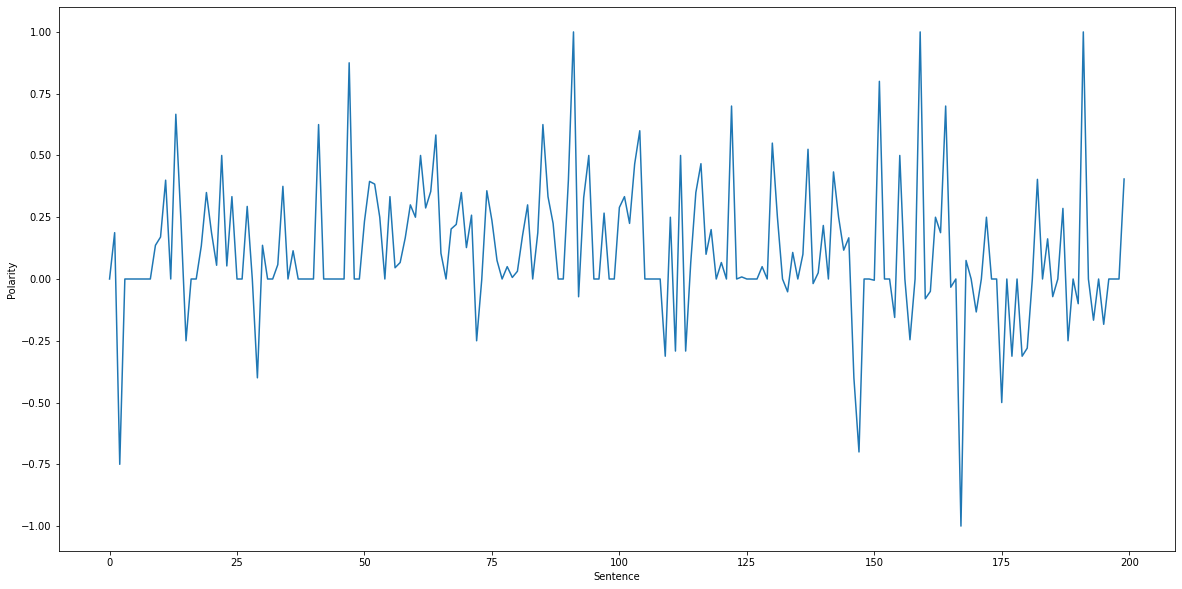

In [ ]:
plt.figure().set_size_inches(20, 10)
plt.plot(sentiment_top_df['polarity'])
plt.xlabel('Sentence')
plt.ylabel('Polarity')
plt.show()